In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

ModuleNotFoundError: No module named 'pandas'

In [2]:
#Testing dataset
filepath = "./netflix.csv"

df = pd.read_csv(filepath,  index_col="show_id", encoding='latin1')

df.head()


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
show_id,,,,,,,,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Understanding the dataset

In [3]:
df.shape

(8809, 25)

In [4]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

Dropping unwanted columns

In [5]:
#Columns 12 to 24 are Unamed and Null columns, thus removing them to avoid confusion
df.drop(df.columns[12:], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8809 entries, s1 to s8809
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          8809 non-null   object 
 1   title         8809 non-null   object 
 2   director      6175 non-null   object 
 3   cast          7984 non-null   object 
 4   country       7978 non-null   object 
 5   date_added    8799 non-null   object 
 6   release_year  8809 non-null   int64  
 7   rating        8805 non-null   object 
 8   duration      8806 non-null   object 
 9   listed_in     8809 non-null   object 
 10  description   8809 non-null   object 
 11  Unnamed: 12   0 non-null      float64
dtypes: float64(1), int64(1), object(10)
memory usage: 894.7+ KB


In [6]:
df.describe()

,release_year,Unnamed: 12
count,8809.000000,0.0
mean,2014.181292,NaN
std,8.818932,NaN
min,1925.000000,NaN
25%,2013.000000,NaN
50%,2017.000000,NaN
75%,2019.000000,NaN
max,2024.000000,NaN


In [7]:
#Checking for null values
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
dtype: int64

In [8]:
# Replacing NaN values in director, cast, country, date_added, rating, duration
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")
df['date_added'] = df['date_added'].fillna('No date')
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Unknown Duration')

In [9]:
# Verify handling of missing values
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
Unnamed: 12     8809
dtype: int64


Explatory Data Analysis (EDA)

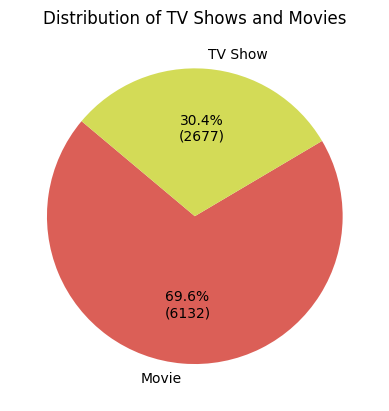

In [10]:
type_counts = df['type'].value_counts()
type_percentages = df['type'].value_counts(normalize=True) * 100

# Define the custom autopct function
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})'
    return my_format


# Define labels and colors
labels = type_counts.index
colors = sns.color_palette('hls')

# Create the pie chart
plt.pie(type_percentages, labels=labels, colors=colors, autopct=autopct_format(type_counts), startangle=140)
plt.title('Distribution of TV Shows and Movies')
plt.show()

In [11]:
def plot_category_counts(data, category_column, plot_title=None, top_n=None):
    """
    Plot the distribution of a categorical variable with counts.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        category_column (str): The name of the column containing the categorical variable.
        top_n (int): The number of top categories to plot (default is None, plots all categories).
    """
    # Count the occurrences of each category
    category_counts = data[category_column].value_counts().reset_index()
    category_counts.columns = [category_column, 'count']

    # Optionally select the top n categories
    if top_n is not None:
        category_counts = category_counts.head(top_n)

    # Create a dummy 'hue' variable
    category_counts['dummy_hue'] = category_counts[category_column]

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    bar_plot = sns.barplot(x='count', y=category_column, hue='dummy_hue', data=category_counts, palette='viridis')

    # Add numbers at the end of each bar
    for index, value in enumerate(category_counts['count']):
        plt.text(value, index, f'{value}', va='center')

    if plot_title is not None:
        plt.title(plot_title) 
    plt.xlabel('Count')
    plt.ylabel(category_column.capitalize())
    plt.show()


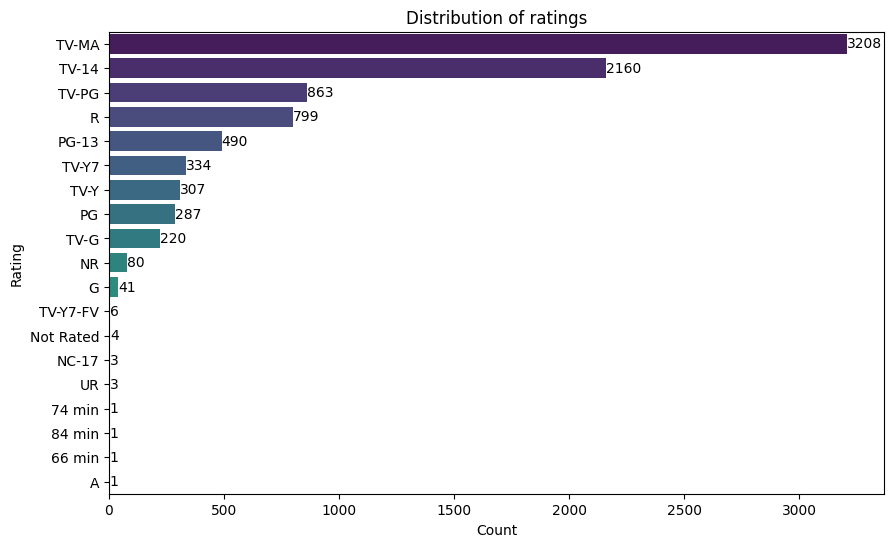

In [12]:
# Bar plot for the distribution of ratings
plot_category_counts(df, 'rating', 'Distribution of ratings')

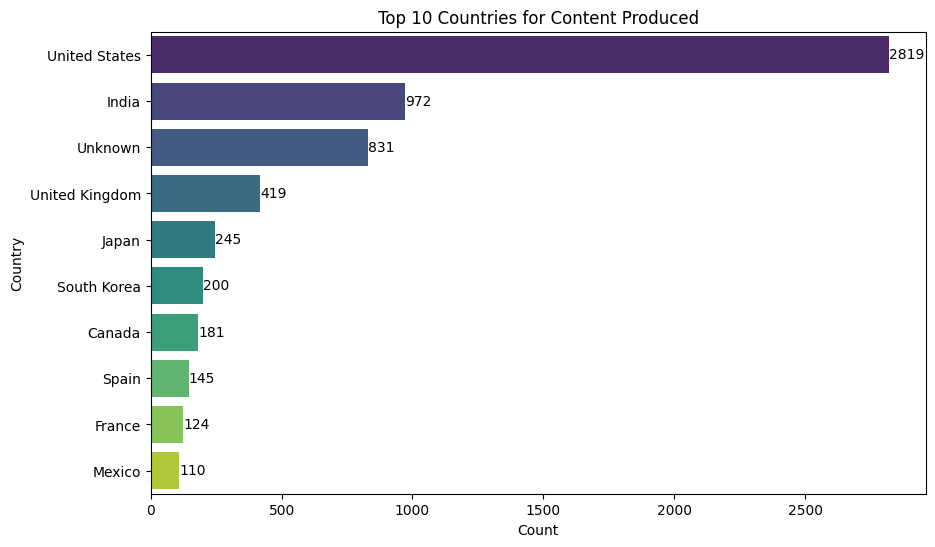

In [14]:
# Bar plot for the distribution of top 10 countries
plot_category_counts(df, 'country', 'Top 10 Countries for Content Produced', top_n=10)